# numpy exercises

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

Theoretical mean: 3.5
[4.5, 3.46, 3.346999999999948, 3.4931000000001773, 3.496300000000358, 3.5022429999772955, 3.500027599697452]


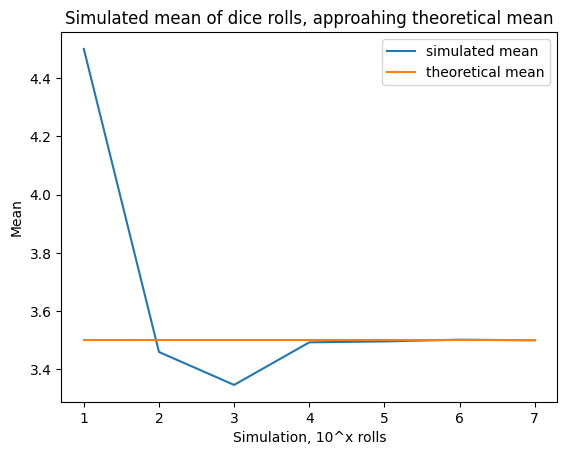

In [14]:
import matplotlib.pyplot as plt
import numpy as np

sets_of_simulations = 7 # amount of sets of die roll simulations, rolls number_of_simulations dice
number_of_simulations = 10 # this is incremented by *10 for each set
sided_die = 6 # what kind of die to be rolled (6 = 6-side sided die etc.)

simulation_number = []

theoretical_mean = sum(range(sided_die + 1)) / sided_die
print(f"Theoretical mean: {theoretical_mean}")

mean_outcome_of_simulations = [0 for set in range(sets_of_simulations)]

for set in range(sets_of_simulations):
    mean_outcome_of_simulations[set] = sum(np.random.randint(1, sided_die + 1, number_of_simulations) / number_of_simulations)
    simulation_number.append(number_of_simulations)
    number_of_simulations *= 10

x = [x + 1 for x in range(sets_of_simulations)]
print(mean_outcome_of_simulations)
plt.plot(x, mean_outcome_of_simulations, label = "simulated mean")
plt.plot(x, [theoretical_mean] * sets_of_simulations, label = "theoretical mean");

plt.legend()

plt.title("Simulated mean of dice rolls, approahing theoretical mean")# name title of graph
plt.xlabel("Simulation, 10^x rolls") # name x-axis
plt.ylabel("Mean"); # name y-axis

## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

In [95]:
import numpy as np

matrix_6x6 = np.zeros((6, 6))

for i in range(6):
    matrix_6x6[i, :] += i + 1
    matrix_6x6[:, i] += i + 1

print(matrix_6x6)
print(matrix_6x6.sum())

[[ 2.  3.  4.  5.  6.  7.]
 [ 3.  4.  5.  6.  7.  8.]
 [ 4.  5.  6.  7.  8.  9.]
 [ 5.  6.  7.  8.  9. 10.]
 [ 6.  7.  8.  9. 10. 11.]
 [ 7.  8.  9. 10. 11. 12.]]
252.0


In [225]:
import numpy as np

dice1 = np.arange(1, 7)
dice2 = np.arange(1, 7)
dice3 = np.arange(1, 7)
dice4 = np.arange(1, 7)

dice2.shape= 6, 1

print(dice1 + dice2)
print((dice1 + dice2).sum())

[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
252


&nbsp; b) Count the number of each values in the sample space (*)

In [229]:
matrix = dice1 + dice2
count = {i: np.count_nonzero(matrix == i) for i in range(matrix.min(), matrix.max() + 1)}
sum_values = 0

for key, value in count.items():
    print(f"{key}s: {value}")
    sum_values += value

2s: 1
3s: 2
4s: 3
5s: 4
6s: 5
7s: 6
8s: 5
9s: 4
10s: 3
11s: 2
12s: 1


&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

In [230]:
print(f"Sum of all values is: {sum_values}")
values = []
frequencies = []

for key, value in count.items():
    print(f"Frequency of {key}s: {value / sum_values:.3f}")
    values.append(key)
    frequencies.append(value / sum_values)

Sum of all values is: 36
Frequency of 2s: 0.028
Frequency of 3s: 0.056
Frequency of 4s: 0.083
Frequency of 5s: 0.111
Frequency of 6s: 0.139
Frequency of 7s: 0.167
Frequency of 8s: 0.139
Frequency of 9s: 0.111
Frequency of 10s: 0.083
Frequency of 11s: 0.056
Frequency of 12s: 0.028


&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.027777777777777776, 0.05555555555555555, 0.08333333333333333, 0.1111111111111111, 0.1388888888888889, 0.16666666666666666, 0.1388888888888889, 0.1111111111111111, 0.08333333333333333, 0.05555555555555555, 0.027777777777777776]


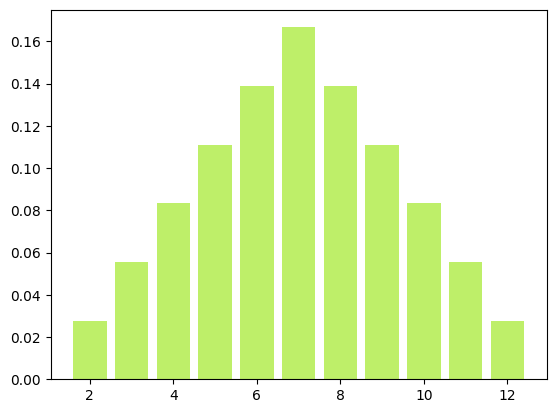

In [231]:
import matplotlib.pyplot as plt

for i in range(len(values)):
    plt.bar(values, frequencies, color = "#BEEF69")

print(values)
print(frequencies)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

In [ ]:
# CLT - central limit theory


## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)

In [ ]:
# x = random